# Eaton Method with Seismic Velocity Data

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
from __future__ import print_function, division, unicode_literals
# for python 2 and 3 compatibility
from builtins import str
try:
    from pathlib import Path
except:
    from pathlib2 import Path

%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

import numpy as np
from IPython.display import display
#--------------------------------------------
import sys
ppath = "../.."

if ppath not in sys.path:
    sys.path.append(ppath)
#--------------------------------------------
import pygeopressure as ppp

Create survey `CUG`:

In [2]:
# set to the directory on your computer
SURVEY_FOLDER = "C:/Users/yuhao/Desktop/CUG_depth"

survey = ppp.Survey(Path(SURVEY_FOLDER))

Retrieve well `CUG1`:

In [3]:
well_cug1 = survey.wells['CUG1']

Get `a`, `b` from well `CUG1`:

In [4]:
a = well_cug1.params['nct']["a"]
b = well_cug1.params['nct']["b"]

Get `n` from well `CUG1`:

In [5]:
n = well_cug1.params['n']

Retrieve seismic data:

In [6]:
vel_cube = survey.seismics['velocity']
obp_cube = survey.seismics['obp_new']

View velocity section:

[None]

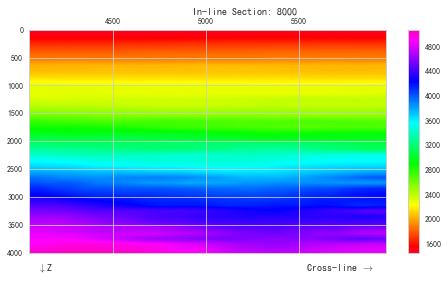

In [14]:
fig_vel, ax_vel = plt.subplots()

im = vel_cube.plot(
    ppp.InlineIndex(8000), ax_vel, kind='img', cm='gist_rainbow')
fig_vel.colorbar(im)
fig_vel.set(figwidth=8)

Pressure Prediction with Eaton method:

In [8]:
eaton_cube = ppp.eaton_seis(
    "eaton_new", obp_cube, vel_cube, n=3, 
    upper=survey.horizons['T16'], lower=survey.horizons['T20'])

View calculated pressure:

[None]

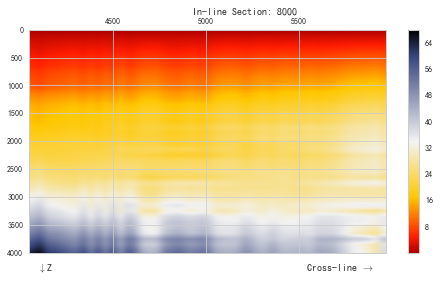

In [9]:
from pygeopressure.basic.vawt import opendtect_seismic_colormap

fig_pres, ax_pres = plt.subplots()

im = eaton_cube.plot(
    ppp.InlineIndex(8000), ax_pres, 
    kind='img', cm=opendtect_seismic_colormap())

fig_pres.colorbar(im)
fig_pres.set(figwidth=8)